In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from urllib.request import urlretrieve
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
#Using the cleaned data containing one hot encoded values for each columns
df=pd.read_csv('/content/hot_encoded_df')
df

,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),passanger_Kid(s),passanger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,...,Restaurant20To50_less1,Restaurant20To50_never,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,55,0,1,0,0,0,1,1
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,1,0,0,1,0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,80,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12002,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,55,0,1,0,0,1,0,1
12003,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,55,0,1,0,0,0,1,1
12004,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,30,0,1,0,0,1,0,0
12005,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,30,0,1,1,1,0,1,0


In [5]:
#Splitting the data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['Y']),df['Y'],train_size=0.7,random_state=42)

In [12]:
#Using logistic regression
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy ",round(accuracy_score(y_test,y_pred),3))
print("Precision ", round(precision_score(y_test,y_pred),3))
print("Recall ", round(recall_score(y_test,y_pred),3))
print("F-1 Score ",round(f1_score(y_test,y_pred),3))


Accuracy  0.675
Precision  0.701
Recall  0.754
F-1 Score  0.727


<Axes: >

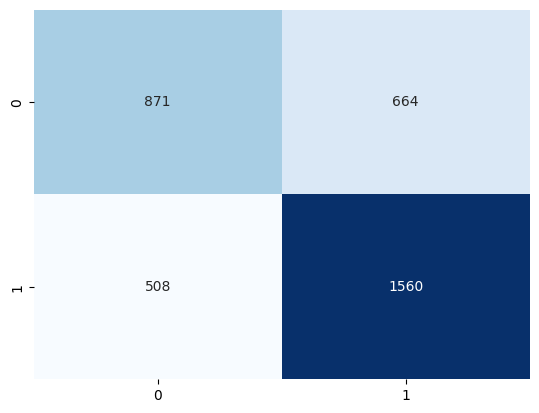

In [21]:
#Confusion matrix for better visualisation
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="Blues",cbar=False,annot=True,fmt='g')

In [29]:
#Using random forest classifier
classifier=RandomForestClassifier(n_estimators=100,random_state=42)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy ",round(accuracy_score(y_test,y_pred),3))
print("Precision ", round(precision_score(y_test,y_pred),3))
print("Recall ", round(recall_score(y_test,y_pred),3))
print("F-1 Score ",round(f1_score(y_test,y_pred),3))

Accuracy  0.75
Precision  0.763
Recall  0.819
F-1 Score  0.79


<Axes: >

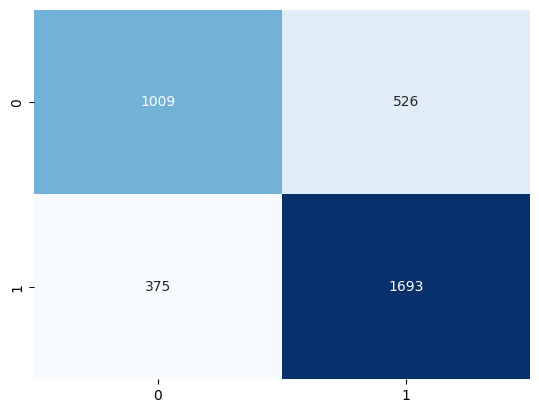

In [30]:
#Confusion matrix for better visualisation
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,cmap="Blues",cbar=False,annot=True,fmt='g')